# WeatherPy - Tyler Hill

In [119]:
import pandas as pd
import requests
import json
import random
import matplotlib.pyplot as plt
from scipy import stats
from pprint import pprint
from api_keys import weather_api_key
from citipy import citipy

In [120]:
# https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={API key}

In [121]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Create lists to store values from for-loop
lats = []
longs = []
cities = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

# Declare number of samples to calculate
num_samples = 20

for x in range(num_samples):
    
    # Randomly generate Latitude and Longitude, append values
    lat = random.uniform(-90,90)
    lats.append(lat)
    long = random.uniform(-180,180)
    longs.append(long)
    
    # Grab nearest city from Lat + Lon, then append 'cities' list
    city = citipy.nearest_city(lat, long)
    f_city = city.city_name.title()
    f_country = city.country_code.upper()
    cities.append(f'{f_city}, {f_country}')
    
    # Build query URL to pull weather data from OpenWeatherMap API using Lat + Lon
    q_url = f'{url}lat={lat}&lon={long}&units={units}&APPID={weather_api_key}'
    response = requests.get(q_url).json()
    
    # Pull relevant data from API calls, declaring a value to be appended
    temp = response["main"]["temp"]
    humid = response["main"]["humidity"]
    cloud = response["clouds"]["all"]
    wind = response["wind"]["speed"]
    
    # Append values to lists
    temperature.append(temp)
    humidity.append(humid)
    cloudiness.append(cloud)
    wind_speed.append(wind)

# Build dataframe from collected values
df = pd.DataFrame({
    "Latitude": lats,
    "Longitude": longs,
    "City": cities,
    "Temperature": temperature,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
})

# Display dataframe
df.head()

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind Speed
0,75.644581,114.616333,"Saskylakh, RU",13.53,90,100,11.41
1,-11.094147,16.078065,"Kibala, AO",60.66,94,100,3.33
2,48.516266,38.794248,"Bryanka, UA",38.57,86,2,4.72
3,67.417537,-109.764170,"Yellowknife, CA",-0.99,91,100,8.70
4,-48.712290,147.765018,"Hobart, AU",46.89,61,87,26.71


In [122]:
# Declare column values for ease of use
lats = df["Latitude"]
longs = df["Longitude"]
temps = df["Temperature"]
humids = df["Humidity"]
clouds = df["Cloudiness"]
winds = df["Wind Speed"]

In [123]:
# Determine max and min values to determine xlim for each plot
temp_min = temps.min()
temp_max = temps.max()

humid_min = humids.min()
humid_max = humids.max()

cloud_min = clouds.min()
cloud_max = clouds.max()

wind_min = winds.min()
wind_max = winds.max()

# Scatter Plots

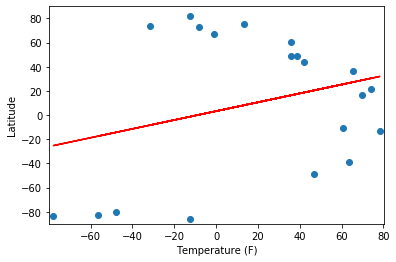

In [124]:
# Temp vs. Latitude
plt.scatter(temps, lats)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(temp_min-2, temp_max+2)

slope, int, r, p, std_err = stats.linregress(temps, lats)
y = slope * temps + int
plt.plot(temps,y,c="r")

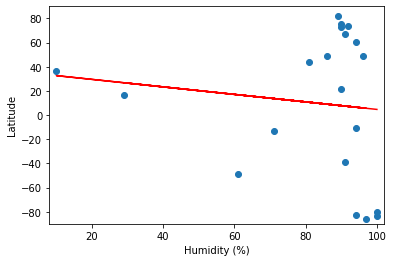

In [125]:
# Humidity vs. Latitude
plt.scatter(humids, lats)
plt.xlabel("Humidity (%)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(humid_min-2,humid_max+2)

slope, int, r, p, std_err = stats.linregress(humids, lats)
y = slope * humids + int
plt.plot(humids,y,c="r")

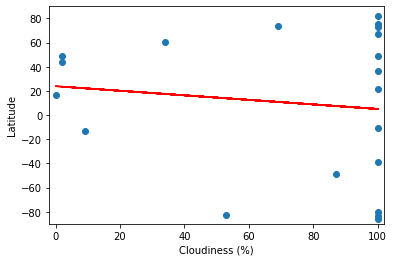

In [126]:
# Cloudiness vs. Latitude
plt.scatter(clouds, lats)
plt.xlabel("Cloudiness (%)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(cloud_min-2, cloud_max+2)

slope, int, r, p, std_err = stats.linregress(clouds, lats)
y = slope * clouds + int
plt.plot(clouds,y,c="r")

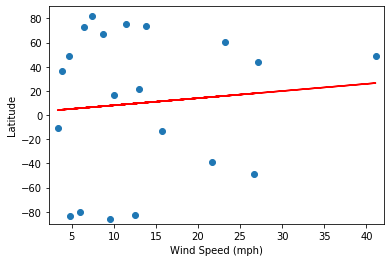

In [127]:
# Wind speed vs. Latitude
plt.scatter(winds, lats)
plt.xlabel("Wind Speed (mph)")
plt.ylabel("Latitude")
plt.ylim(-90,90)
plt.xlim(wind_min-1, wind_max+1)

slope, int, r, p, std_err = stats.linregress(winds, lats)
y = slope * winds + int
plt.plot(winds,y,c="r")

# Separate values into Northern and Southern Hemispheres

In [130]:
hemisphere = []
for index, row in df.iterrows():
    lat = row["Latitude"]
    if lat >= 0:
        hem = "Northern"
        hemisphere.append(hem)
    elif lat < 0:
        hem = "Southern"
        hemisphere.append(hem)
df["Hemisphere"] = hemisphere
df.head()

,Latitude,Longitude,City,Temperature,Humidity,Cloudiness,Wind Speed,Hemisphere
0,75.644581,114.616333,"Saskylakh, RU",13.53,90,100,11.41,Northern
1,-11.094147,16.078065,"Kibala, AO",60.66,94,100,3.33,Southern
2,48.516266,38.794248,"Bryanka, UA",38.57,86,2,4.72,Northern
3,67.417537,-109.764170,"Yellowknife, CA",-0.99,91,100,8.70,Northern
4,-48.712290,147.765018,"Hobart, AU",46.89,61,87,26.71,Southern


In [131]:
n_hem = df.loc[(df["Hemisphere"]) == "Northern"]
s_hem = df.loc[(df["Hemisphere"]) == "Southern"]

In [132]:
n_lats = n_hem["Latitude"]
s_lats = s_hem["Latitude"]
n_longs = n_hem["Longitude"]
s_longs = s_hem["Longitude"]
n_temps = n_hem["Temperature"]
s_temps = s_hem["Temperature"]
n_humids = n_hem["Humidity"]
s_humids = s_hem["Humidity"]
n_clouds = n_hem["Cloudiness"]
s_clouds = s_hem["Cloudiness"]
n_winds = n_hem["Wind Speed"]
s_winds = s_hem["Wind Speed"]

In [133]:
min_n_temps = n_temps.min()
max_n_temps = n_temps.max()
min_s_temps = s_temps.min()
max_s_temps = s_temps.max()

min_n_humids = n_humids.min()
max_n_humids = n_humids.max()
min_s_humids = s_humids.min()
max_s_humids = s_humids.max()

min_n_clouds = n_clouds.min()
max_n_clouds = n_clouds.max()
min_s_clouds = s_clouds.min()
max_s_clouds = s_clouds.max()

min_n_winds = n_winds.min()
max_n_winds = n_winds.max()
min_s_winds = s_winds.min()
max_s_winds = s_winds.max()

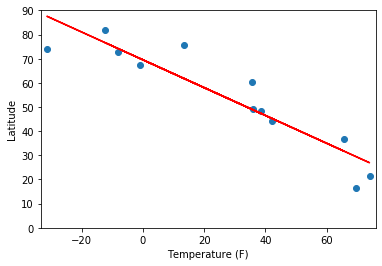

In [134]:
# Temp vs. Latitude # Northern Hemisphere
plt.scatter(n_temps, n_lats)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_temps-2, max_n_temps+2)

slope, int, r, p, std_err = stats.linregress(n_temps, n_lats)
y = slope * n_temps + int
plt.plot(n_temps,y,c="r")

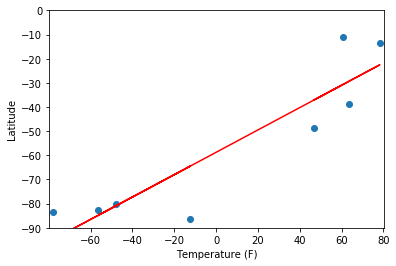

In [135]:
# Temp vs. Latitude # Southern Hemisphere
plt.scatter(s_temps, s_lats)
plt.xlabel("Temperature (F)")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_temps-2, max_s_temps+2)

slope, int, r, p, std_err = stats.linregress(s_temps, s_lats)
y = slope * s_temps + int
plt.plot(s_temps,y,c="r")

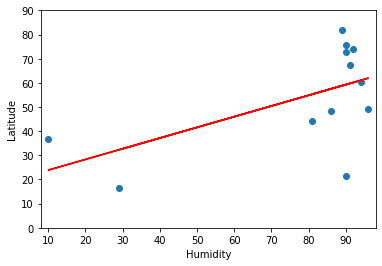

In [136]:
# Humidity vs. Latitude # Northern Hemisphere
plt.scatter(n_humids, n_lats)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_humids-2, max_n_humids+2)

slope, int, r, p, std_err = stats.linregress(n_humids, n_lats)
y = slope * n_humids + int
plt.plot(n_humids,y,c="r")

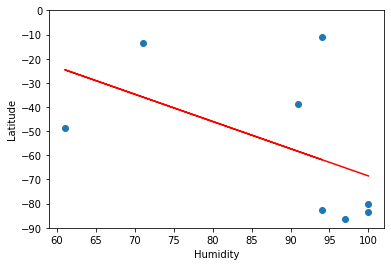

In [137]:
# Humidity vs. Latitude # Southern Hemisphere
plt.scatter(s_humids, s_lats)
plt.xlabel("Humidity")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_humids-2, max_s_humids+2)

slope, int, r, p, std_err = stats.linregress(s_humids, s_lats)
y = slope * s_humids + int
plt.plot(s_humids,y,c="r")

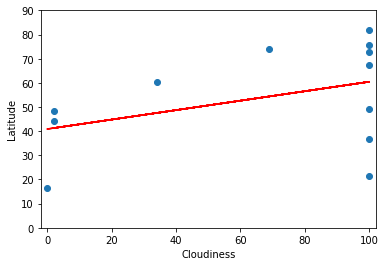

In [138]:
# Cloudiness vs. Latitude # Northern Hemisphere
plt.scatter(n_clouds, n_lats)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_clouds-2, max_n_clouds+2)

slope, int, r, p, std_err = stats.linregress(n_clouds, n_lats)
y = slope * n_clouds + int
plt.plot(n_clouds,y,c="r")

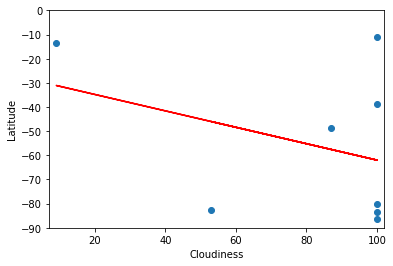

In [139]:
# Cloudiness vs. Latitude # Southern Hemisphere
plt.scatter(s_clouds, s_lats)
plt.xlabel("Cloudiness")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_clouds-2, max_s_clouds+2)

slope, int, r, p, std_err = stats.linregress(s_clouds, s_lats)
y = slope * s_clouds + int
plt.plot(s_clouds,y,c="r")

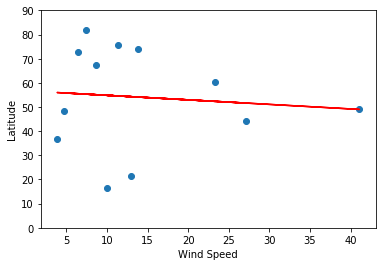

In [140]:
# Wind Speed vs. Latitude # Northern Hemisphere
plt.scatter(n_winds, n_lats)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.ylim(0,90)
plt.xlim(min_n_winds-2, max_n_winds+2)

slope, int, r, p, std_err = stats.linregress(n_winds, n_lats)
y = slope * n_winds + int
plt.plot(n_winds,y,c="r")

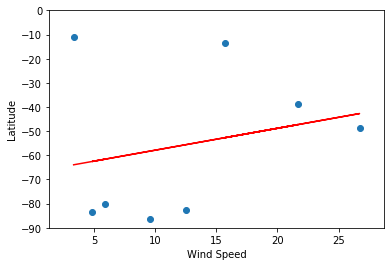

In [141]:
# Wind Speed vs. Latitude # Southern Hemisphere
plt.scatter(s_winds, s_lats)
plt.xlabel("Wind Speed")
plt.ylabel("Latitude")
plt.ylim(-90,0)
plt.xlim(min_s_winds-2, max_s_winds+2)

slope, int, r, p, std_err = stats.linregress(s_winds, s_lats)
y = slope * s_winds + int
plt.plot(s_winds,y,c="r")